In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
start_date = '2010-01-22'
end_date = '2010-01-26'
dates = pd.date_range(start_date, end_date)

In [3]:
df1 = pd.DataFrame(index=dates)
df1

""
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26


In [4]:
dfSPY = pd.read_csv(
    'data/SPY.csv',
    index_col='Date',
    parse_dates=True,
    usecols=['Date', 'Adj Close'],
    na_values=['nan']
)
dfSPY.head()

,Adj Close
Date,
2009-02-17,65.820671
2009-02-18,65.662827
2009-02-19,64.956581
2009-02-20,64.325142
2009-02-23,62.023678


### Default join(left)

In [5]:
df1 = df1.join(dfSPY)
df1

,Adj Close
2010-01-22,92.838760
2010-01-23,NaN
2010-01-24,NaN
2010-01-25,93.314789
2010-01-26,92.923737


In [6]:
df1 = df1.dropna()
df1

,Adj Close
2010-01-22,92.838760
2010-01-25,93.314789
2010-01-26,92.923737


### Inner join

In [7]:
# Dont need to filter out na
df1 = pd.DataFrame(index=dates)
df1 = df1.join(dfSPY, how='inner')
df1

,Adj Close
2010-01-22,92.838760
2010-01-25,93.314789
2010-01-26,92.923737


### Combine dataframes

In [8]:
"""Utility functions"""
import os
import pandas as pd


def symbol_to_path(symbol, base_dir='data'):
    """Return csv file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    
    # add SPY for reference, if absent
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(
            'data/{}.csv'.format(symbol),
            index_col='Date',
            parse_dates=True,
            usecols=['Date', 'Adj Close'],
            na_values=['nan'])
    
        # rename to prevent crashing
        df_temp = df_temp.rename(columns={'Adj Close': symbol})

        # Join
        df = df.join(df_temp, how='inner')
        
        # drop dates SPY did not trade
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
    return df


# test
## Define a date range
dates = pd.date_range('2010-01-22', '2010-01-26')

## Choose stock symbols to read
symbols = ['GOOG', 'IBM', 'GLD']

## Get stock data
df = get_data(symbols, dates)
df

,SPY,GOOG,IBM,GLD
2010-01-22,92.838760,273.227905,101.422798,107.169998
2010-01-25,93.314789,268.255249,101.923859,107.480003
2010-01-26,92.923737,269.457428,101.624863,107.559998


### Slicing

In [9]:
## Define a date range (year = 2010)
dates = pd.date_range('2010-01-01', '2010-12-31')

## Choose stock symbols to read
symbols = ['GOOG', 'IBM', 'GLD']

## Get stock data
df = get_data(symbols, dates)

In [10]:
## Slice by rows (year = 2010, month = Jan)
df.ix['2010-01-01':'2010-01-31']

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,SPY,GOOG,IBM,GLD
2010-01-04,96.341141,311.349976,107.039436,109.800003
2010-01-05,96.596169,309.978882,105.746422,109.699997
2010-01-06,96.664169,302.164703,105.059486,111.510002
2010-01-07,97.072220,295.130463,104.695839,110.820000
2010-01-08,97.395248,299.064880,105.746422,111.370003
2010-01-11,97.531265,298.612823,104.639252,112.849998
2010-01-12,96.621658,293.332153,105.471634,110.489998
2010-01-13,97.437737,291.648102,105.245346,111.540001
2010-01-14,97.701286,293.019196,106.926292,112.029999
2010-01-15,96.604675,288.126007,106.497978,110.860001


In [11]:
## slice 1 column
df['GOOG'].head()

2010-01-04    311.349976
2010-01-05    309.978882
2010-01-06    302.164703
2010-01-07    295.130463
2010-01-08    299.064880
Name: GOOG, dtype: float64

In [12]:
## slice by columns
df[['IBM', 'GLD']].head()

,IBM,GLD
2010-01-04,107.039436,109.800003
2010-01-05,105.746422,109.699997
2010-01-06,105.059486,111.510002
2010-01-07,104.695839,110.820000
2010-01-08,105.746422,111.370003


In [13]:
## slice by row and columns
df.ix['2010-03-10':'2010-03-15', ['SPY', 'IBM']] # Same
df.loc['2010-03-10':'2010-03-15', ['SPY', 'IBM']] # Same

,SPY,IBM
2010-03-10,97.735283,101.973839
2010-03-11,98.143333,103.581131
2010-03-12,98.151855,103.857132
2010-03-15,98.177315,103.767838


### Plotting

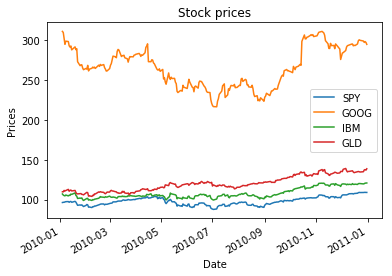

In [14]:
df = df.loc['2010-01-01':'2010-12-31']

ax = df.plot(title='Stock prices')
ax.set_xlabel('Date')
ax.set_ylabel('Prices')

plt.show()

### Plot Normalized data

In [15]:
df.iloc[0, :]

SPY      96.341141
GOOG    311.349976
IBM     107.039436
GLD     109.800003
Name: 2010-01-04 00:00:00, dtype: float64

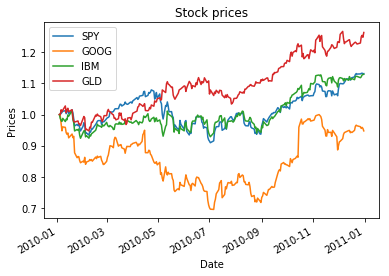

In [16]:
df = df/df.iloc[0, :] # Or df = df/df.ix[0, :]

ax = df.plot(title='Stock prices')
ax.set_xlabel('Date')
ax.set_ylabel('Prices')

plt.show()